In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder



In [ ]:
# loading dataset and trasforming it into dataframe 

df  = pd.read_csv('df_without_outliers.csv')

In [ ]:
# checking info about target variable 
df['popularity'].describe()

count    89341.000000
mean        31.476478
std         21.525988
min          0.000000
25%         15.000000
50%         31.000000
75%         48.000000
max         95.000000
Name: popularity, dtype: float64

In [ ]:
# dropping not useful column
df = df.drop(columns='Unnamed: 0' )


In [24]:
df

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89336,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07
89337,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04
89338,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07
89339,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04


In [11]:
df['popularity'].median()

31.0

In [ ]:
# definition of the function to discretize popularity values. 3 classes are defined (low, medium,high)
# the discretizazion of the values is based on standard deviation of the values belonging to the popularity feature

def popularity_discretizer(observation):
    pop_mean = df['popularity_art'].mean()
    pop_std = df['popularity_art'].std()
    if observation <= pop_mean - pop_std:
        return 'low popularity'
    elif observation <= pop_mean + pop_std:
        return 'medium popularity'
    else:
        return 'high popularity'

In [6]:
classes = df['popularity'].apply(popularity_discretizer)

In [7]:
counts_per_class = classes.value_counts().sort_values(ascending = False)

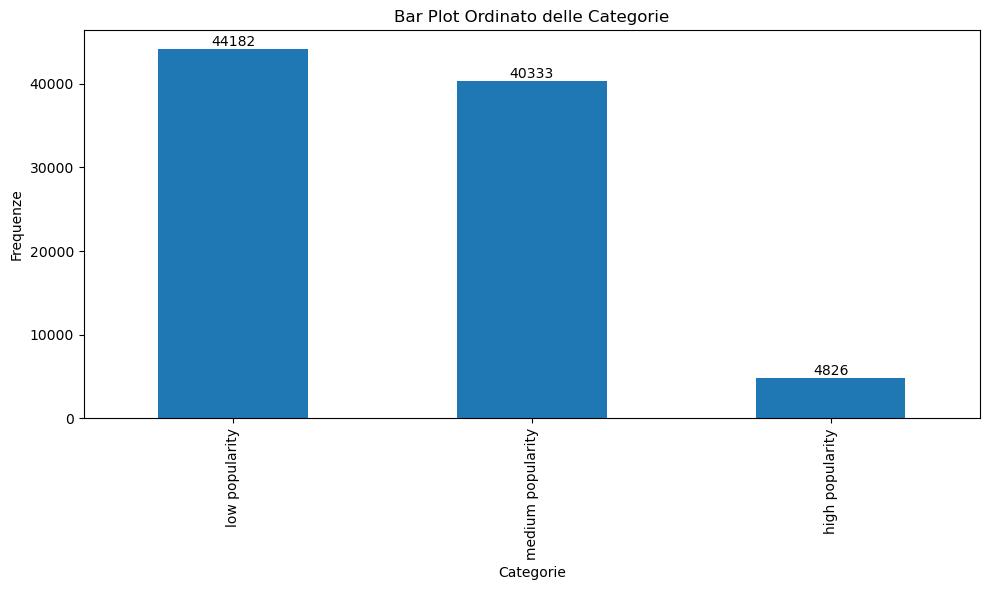

In [ ]:
# plotting frequency of the instances belonging to each class 

plt.figure(figsize = (10,6))
counts_per_class.plot(kind = 'bar')
plt.title('Bar Plot Ordinato delle Categorie')
plt.xlabel('Categorie')
plt.ylabel('Frequenze')
for i, v in enumerate(counts_per_class):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# removing  polularity column  
df = df.drop(columns = 'popularity')


In [ ]:
# encoding labels
encoder= LabelEncoder()
y = encoder.fit_transform(classes)

DATA PARTITIONING

In [11]:
X_train ,X_test, y_train,y_test = train_test_split(df,y,test_size = 0.2,random_state = 100, stratify = y  )

In [ ]:
# splitting training set into validation set 

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state = 100, stratify = y_train )

In [13]:
X_train_new.shape, X_val.shape, y_train_new.shape, y_val.shape

((57177, 25), (14295, 25), (57177,), (14295,))

NORMALIZATION

In [ ]:
# normalization with scaler 
scaler = StandardScaler()
scaler.fit(X_train_new)
X_tr_new_scaled = scaler.transform(X_train_new)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# keeping sizes of training set as trial 
X_train_big = scaler.fit_transform(X_train)

Classification with skleanr Multilayer Perceptron classifier 

In [ ]:
# importing library 
from sklearn.neural_network import MLPClassifier

In [20]:
#model building 

model1 = MLPClassifier(
    hidden_layer_sizes=(20,),  
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42)







In [ ]:
# fitting model 1
%time
model1.fit(X_train_big,y_train)

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 16.2 µs


MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)

In [23]:
y_pred = model1.predict(X_test_scaled)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.09547260618949018
F1-score [0.03495358 0.22268295 0.        ]
              precision    recall  f1-score   support

           0       0.02      0.27      0.03       965
           1       0.35      0.16      0.22      8837
           2       0.00      0.00      0.00      8067

    accuracy                           0.10     17869
   macro avg       0.12      0.14      0.09     17869
weighted avg       0.17      0.10      0.11     17869



/Users/thomasgonzo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/thomasgonzo/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomasgonzo/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomasgonzo/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-define

In [ ]:
model2 =  MLPClassifier(
    hidden_layer_sizes=(20, 10),  
    solver='adam',
    max_iter=1000,
    random_state=42)
    
model3 = MLPClassifier(
    hidden_layer_sizes=(25, 15, 8),  
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42)
models = [model1, model2, model3]  

In [ ]:
%time
for i,model in enumerate(models,1):
    model.fit(X_train_big,y_train)
    y_pred = model.predict(X_test_scaled)
    print('Accuracy %s  configuration {}'.format(i) % accuracy_score(y_test, y_pred))
    print('F1-score %s configuration {}'.format(i) % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs
Accuracy 0.7388773854160837  configuration 1
F1-score [0.33915575 0.78214265 0.72641902] configuration 1
              precision    recall  f1-score   support

           0       0.57      0.24      0.34       965
           1       0.79      0.78      0.78      8837
           2       0.70      0.76      0.73      8067

    accuracy                           0.74     17869
   macro avg       0.69      0.59      0.62     17869
weighted avg       0.74      0.74      0.73     17869

Accuracy 0.740948010521014  configuration 2
F1-score [0.30162413 0.78001162 0.73489991] configuration 2
              precision    recall  f1-score   support

           0       0.59      0.20      0.30       965
           1       0.80      0.76      0.78      8837
           2       0.69      0.79      0.73      8067

    accuracy                           0.74     17869
   macro avg       0.70      0.58      0.61     17869
weighted avg    

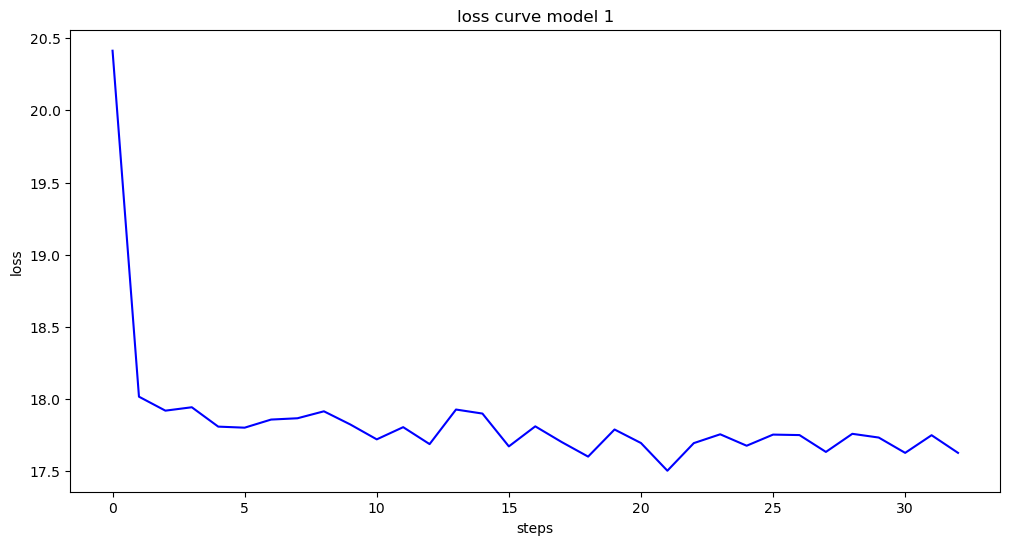

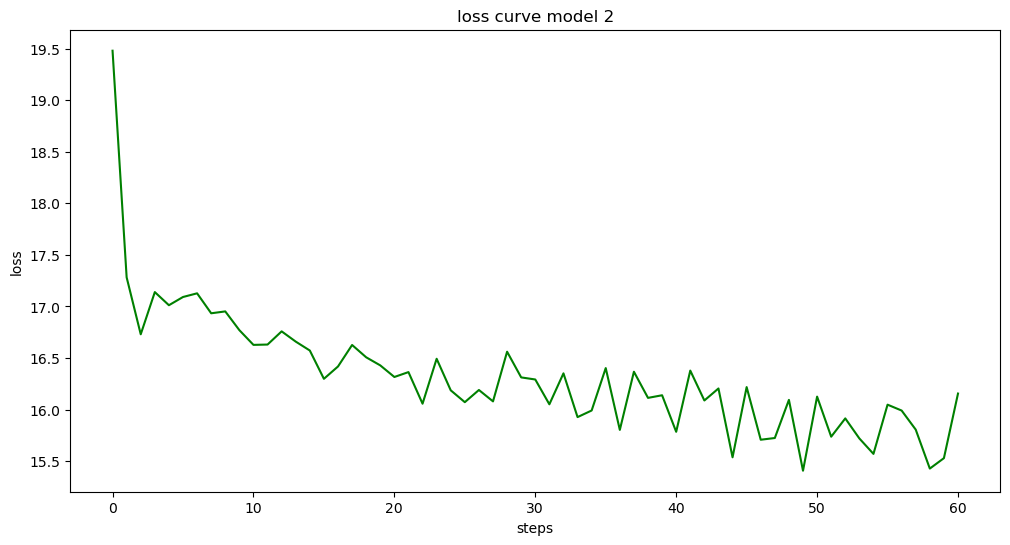

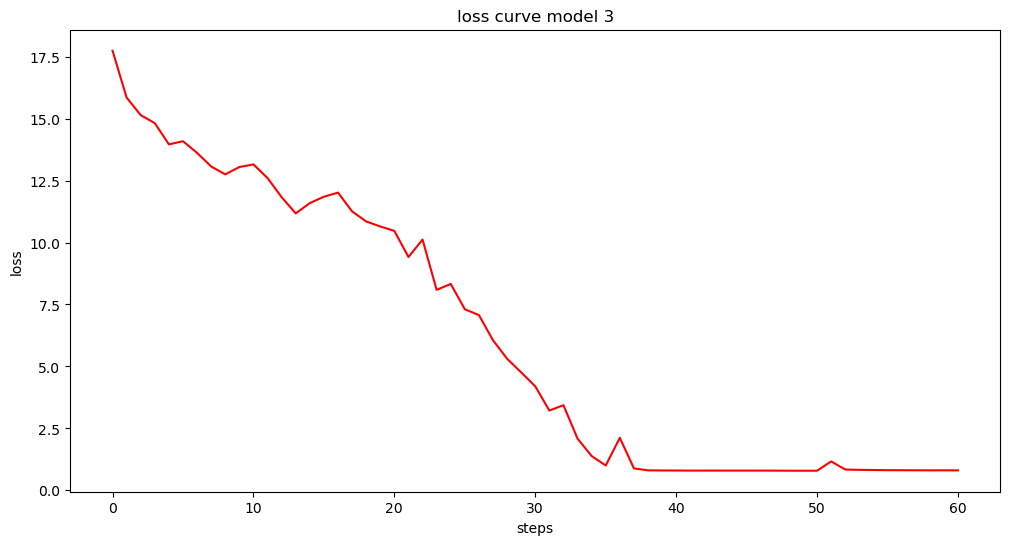

In [ ]:
#plotting loss curves
color = ('b', 'g', 'r')

for i,(color,model) in enumerate (zip(color, models),1):
    plt.figure(figsize = (12,6))
    plt.plot(model.loss_curve_ , c = color)
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.title('loss curve model {}'.format(i))  
    plt.show()

In [ ]:
model4 = MLPClassifier(
    hidden_layer_sizes=(128,64,32),  
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42)

model4.fit(X_train_big,y_train)

y_pred = model4.predict(X_test_scaled)
print('Accuracy %s  configuration 4' % accuracy_score(y_test, y_pred))
print('F1-score %s configuration 4' % f1_score(y_test, y_pred, average=None))
    
print(classification_report(y_test, y_pred))

Accuracy 0.6963456265040013  configuration 4
F1-score [0.36569579 0.74311873 0.68466951] configuration 4
              precision    recall  f1-score   support

           0       0.38      0.35      0.37       965
           1       0.76      0.73      0.74      8837
           2       0.66      0.71      0.68      8067

    accuracy                           0.70     17869
   macro avg       0.60      0.59      0.60     17869
weighted avg       0.70      0.70      0.70     17869

